In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Suicides.csv')
df

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


In [3]:
df.isna().sum()

df.dropna(inplace = True)

df.isna().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

In [4]:
def duplicates():
  if df.duplicated().any():
    print("There are Duplicted")
  else:
    print("No Duplicates")

duplicates()

No Duplicates


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


C:\Users\Shashikanth\AppData\Local\Temp\ipykernel_8600\3561881478.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = "Year", y = "Total", data = df, palette = 'bright')


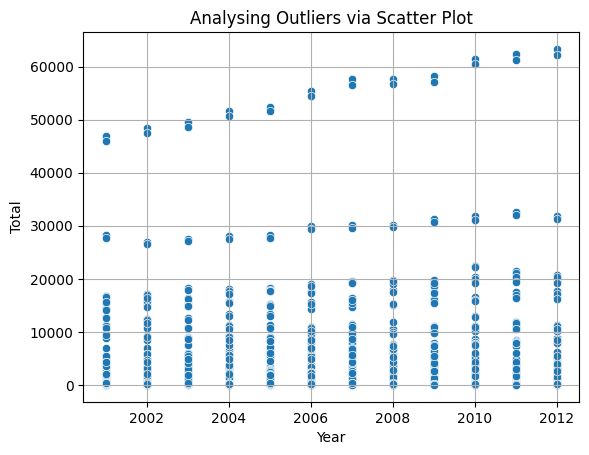

In [6]:
sns.scatterplot(x = "Year", y = "Total", data = df, palette = 'bright')

plt.title("Analysing Outliers via Scatter Plot")
plt.grid(True)



<h2>Exploratory Data Analysis</h2>

In [7]:
df['Year'].value_counts()

2011    19806
2005    19803
2012    19799
2001    19797
2008    19797
2007    19794
2010    19792
2002    19790
2003    19786
2006    19786
2009    19786
2004    19783
Name: Year, dtype: int64

In [8]:
df['Gender'].value_counts()

Male      118879
Female    118640
Name: Gender, dtype: int64

In [9]:
df[df['Type'] == 'Unemployed'].value_counts()

State          Year  Type_code             Type        Gender  Age_group  Total
A & N Islands  2001  Professional_Profile  Unemployed  Female  0-14       0        1
Mizoram        2003  Professional_Profile  Unemployed  Male    60+        0        1
               2004  Professional_Profile  Unemployed  Female  15-29      3        1
                                                               30-44      0        1
                                                               45-59      0        1
                                                                                  ..
Gujarat        2009  Professional_Profile  Unemployed  Male    0-14       1        1
                                                               15-29      184      1
                                                               30-44      226      1
                                                               45-59      69       1
West Bengal    2012  Professional_Profile  Unemployed  Male    60+    

In [10]:
group = df[df['Type'] == 'Dowry Dispute'].groupby('Gender').size()
group

Gender
Female    2100
Male      2100
dtype: int64

In [11]:

group = df['Gender'].groupby(df['Total']).value_counts()
group

Total  Gender
0      Female    71906
       Male      63575
1      Female     8236
       Male       7811
2      Male       5039
                 ...  
61242  Male          1
61453  Male          1
62123  Male          1
62433  Male          1
63343  Male          1
Name: Gender, Length: 3089, dtype: int64

In [12]:
sum_by_group = df.groupby('Gender')['Total'].sum()
sum_by_group



Gender
Female    4702974
Male      8368760
Name: Total, dtype: int64

In [13]:
df1 = df[df['Gender'] == 'Female']
df1

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
237509,West Bengal,2012,Social_Status,Seperated,Female,0-100+,200
237510,West Bengal,2012,Social_Status,Married,Female,0-100+,3927
237511,West Bengal,2012,Social_Status,Divorcee,Female,0-100+,182
237512,West Bengal,2012,Social_Status,Widowed/Widower,Female,0-100+,455


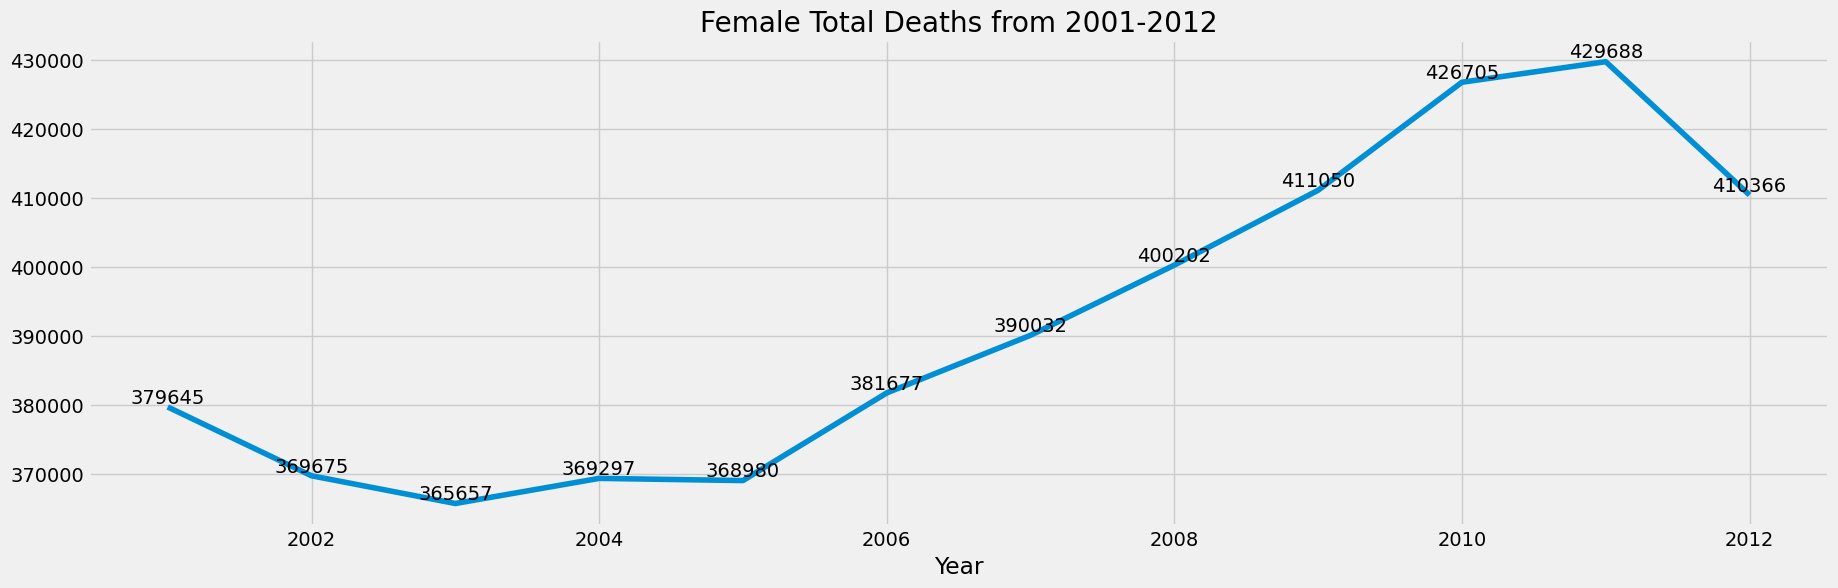

In [38]:
group = df1.groupby('Year')['Total'].sum()
plt.figure(figsize = (20,6))

plt.style.use('fivethirtyeight')
group.plot(kind = 'line')

for x, y in zip(group.index, group.values):
    label = f"{y}"  
    plt.text(x, y, label, ha='center', va='bottom')

plt.title("Female Total Deaths from 2001-2012")
plt.grid(True)

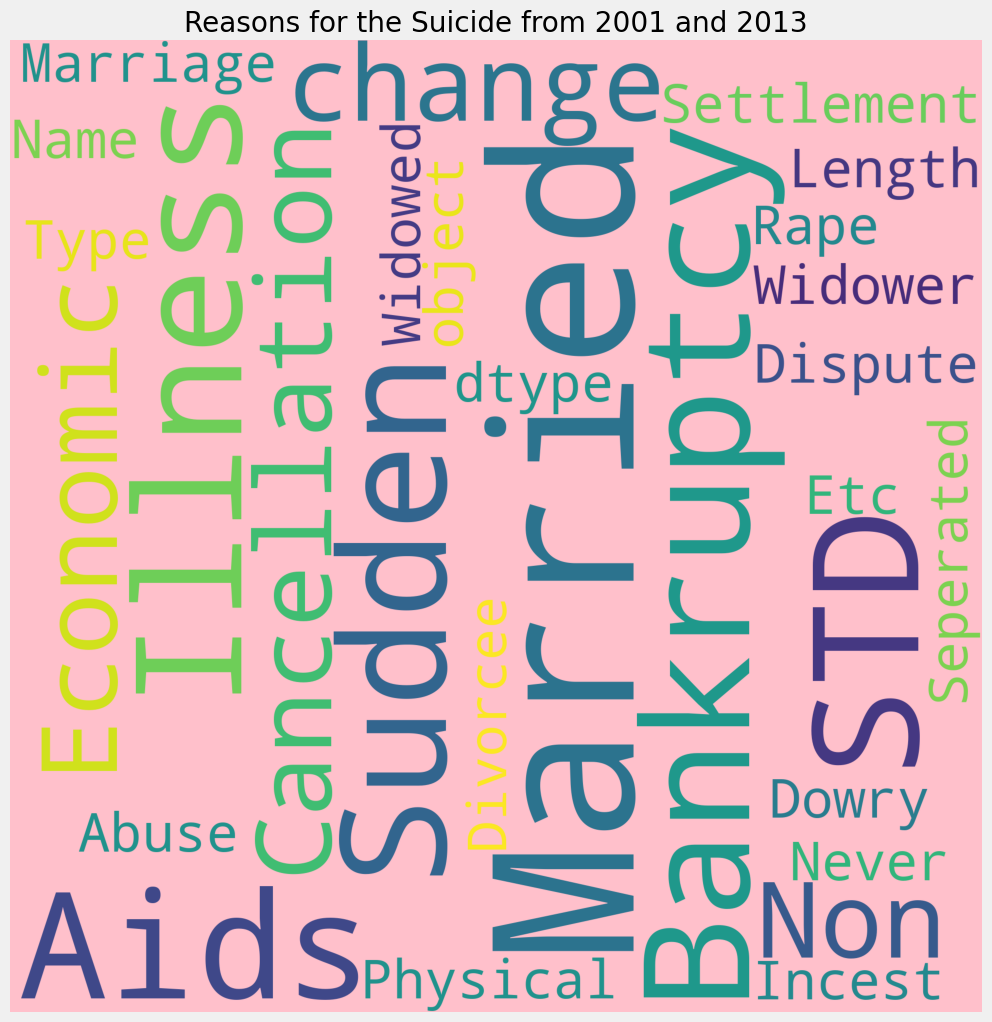

In [18]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'pink',
                      height =2000,
                      width = 2000
                     ).generate(str(df["Type"]))
plt.rcParams['figure.figsize'] = (12,12)
plt.axis("off")
plt.imshow(wordcloud)
plt.title("Reasons for the Suicide from 2001 and 2013")
plt.show()

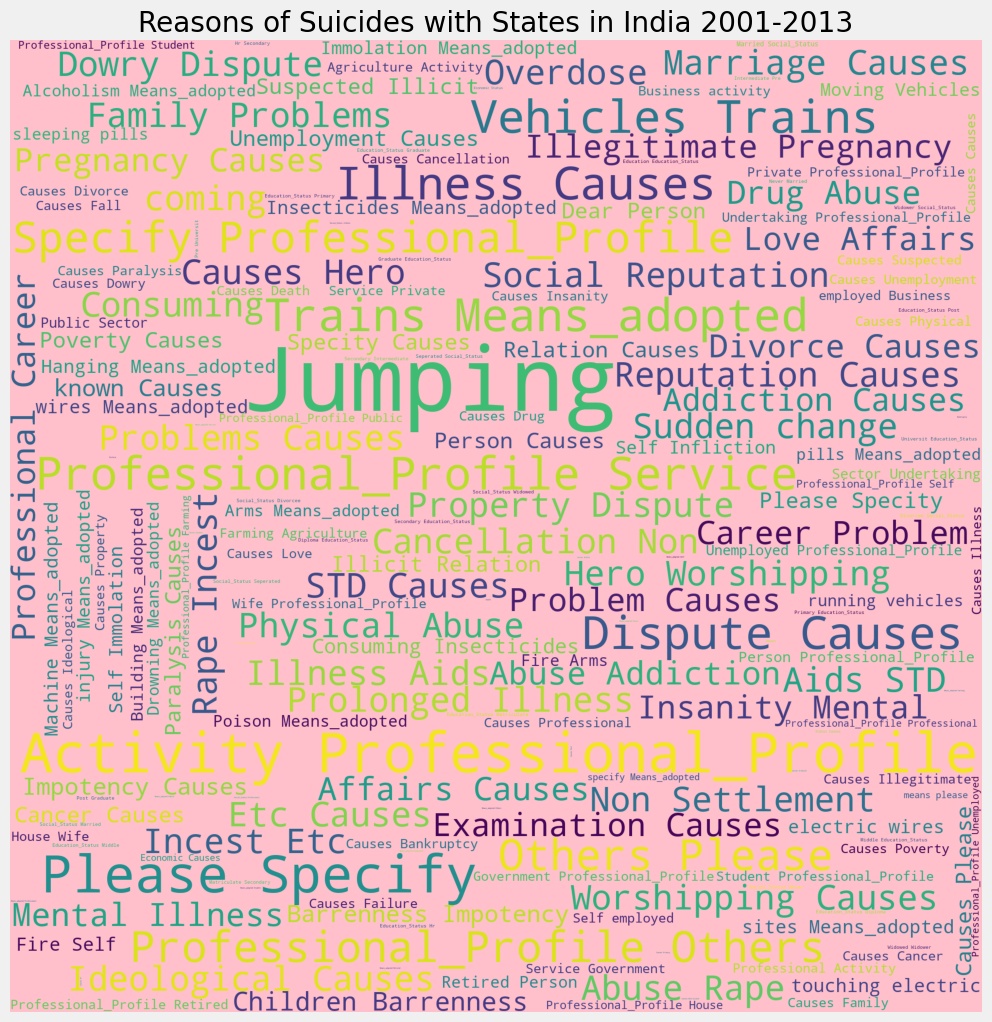

In [33]:
stopwords = set(STOPWORDS)

df['Text'] = df['Type'] + ' ' + df['Type_code'].astype(str)

wordcloud = WordCloud(background_color='pink', height=2000, width=2000, stopwords=stopwords).generate(' '.join(df['Text']))

plt.rcParams['figure.figsize'] = (12, 12)

plt.axis("off")

plt.imshow(wordcloud)
plt.title("Reasons of Suicides with States in India 2001-2013")

plt.show()


Text(0.5, 1.0, '% of Female and Male')

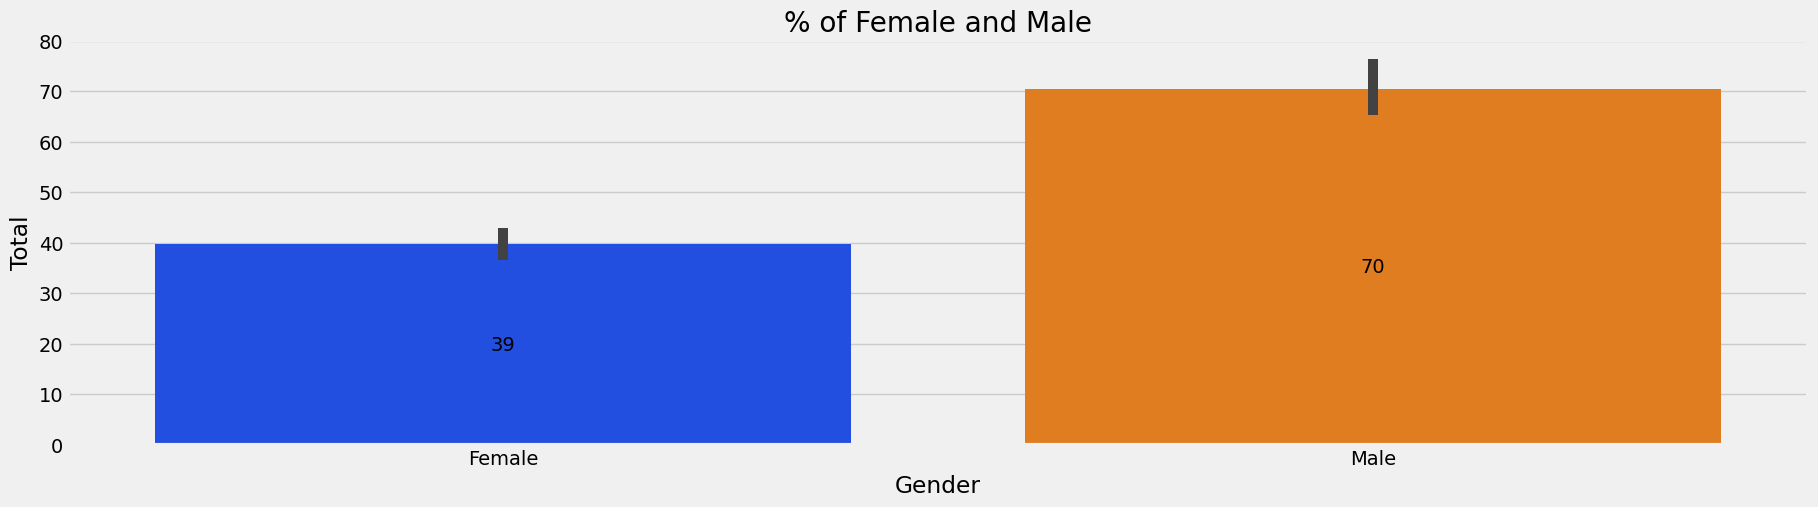

In [40]:
plt.figure(figsize = (20,5))

ax = sns.barplot(x = 'Gender', y = 'Total', data=df, palette = 'bright')
plt.bar_label(ax.containers[0], fmt = '%d', label_type = 'center')


plt.title("% of Female and Male")

In [41]:
df.columns

Index(['State', 'Year', 'Type_code', 'Type', 'Gender', 'Age_group', 'Total',
       'Text'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'A & N Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Chhattisgarh'),
  Text(7, 0, 'D & N Haveli'),
  Text(8, 0, 'Daman & Diu'),
  Text(9, 0, 'Delhi (Ut)'),
  Text(10, 0, 'Goa'),
  Text(11, 0, 'Gujarat'),
  Text(12, 0, 'Haryana'),
  Text(13, 0, 'Himachal Pradesh'),
  Text(14, 0, 'Jammu & Kashmir'),
  Text(15, 0, 'Jharkhand'),
  Text(16, 0, 'Karnataka'),
  Text(17, 0, 'Kerala'),
  Text(18, 0, 'Lakshadweep'),
  Text(19, 0, 'Madhya Pradesh'),
  Text(20, 0, 'Maharashtra'),
  Text(21, 0, 'Manipur'),
  Text(22, 0, 'Meghalaya'),
  Text(23, 0, 'Mizoram'),
  Text(24, 0, 'Nagaland'),
  Text(25, 0, 'Odisha'),
  Text(26, 0, 'Puducherry'),
  Text(27, 0, 'Punjab'),
  Text(28, 0, 'Rajasthan'),
  

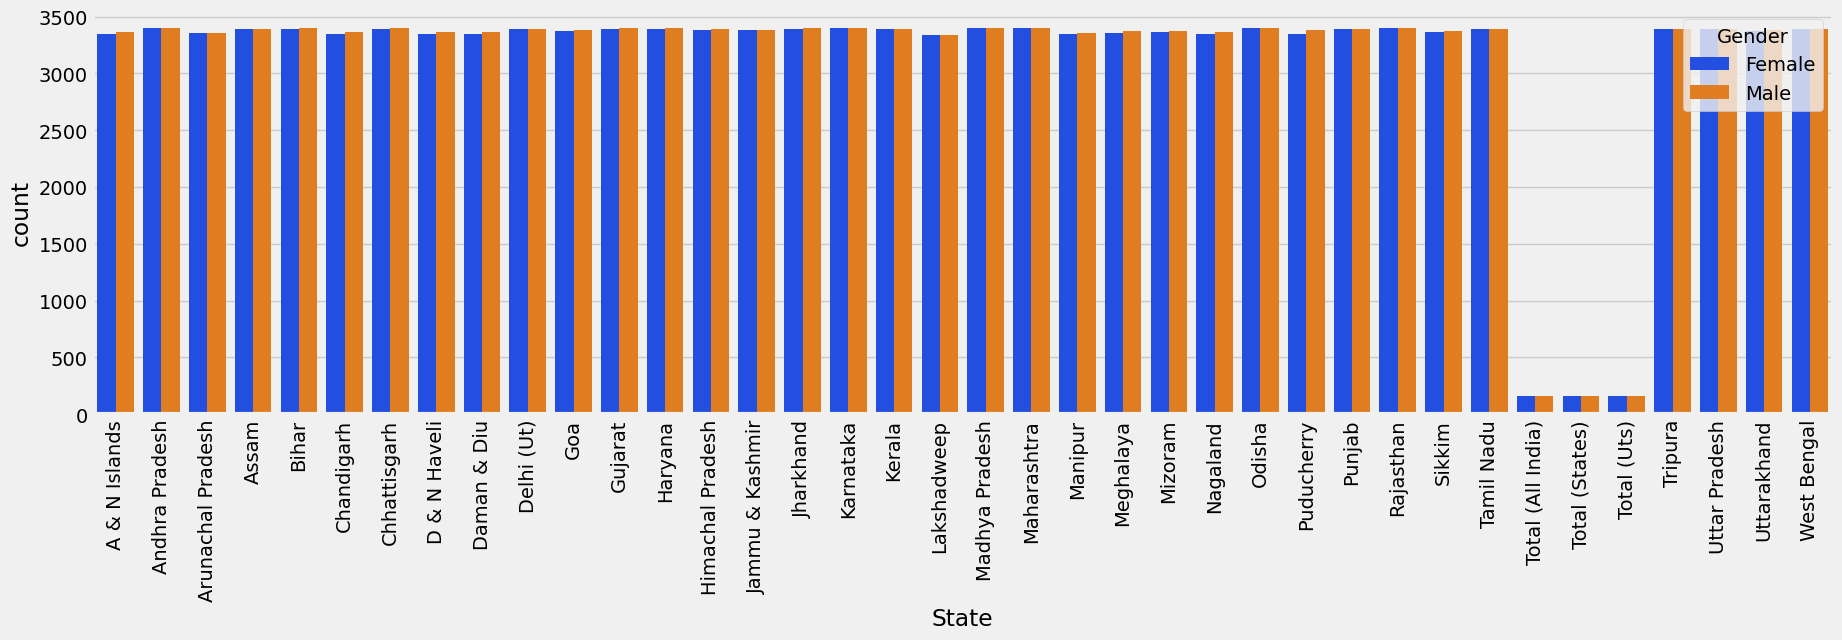

In [45]:
plt.figure(figsize = (20,5))

sns.countplot(x = 'State', hue = 'Gender', data = df, palette = 'bright')

plt.xticks(rotation = 90)

In [52]:
df2 = df[df['State'] == 'Karnataka']
df2

,State,Year,Type_code,Type,Gender,Age_group,Total,Text
108144,Karnataka,2001,Causes,Insanity/Mental Illness,Female,0-14,11,Insanity/Mental Illness Causes
108145,Karnataka,2001,Causes,Causes Not known,Female,0-14,42,Causes Not known Causes
108146,Karnataka,2001,Causes,Property Dispute,Female,0-14,0,Property Dispute Causes
108147,Karnataka,2001,Causes,Drug Abuse/Addiction,Female,0-14,5,Drug Abuse/Addiction Causes
108148,Karnataka,2001,Causes,Cancer,Female,0-14,0,Cancer Causes
...,...,...,...,...,...,...,...,...
114931,Karnataka,2012,Social_Status,Seperated,Male,0-100+,215,Seperated Social_Status
114932,Karnataka,2012,Social_Status,Married,Male,0-100+,6216,Married Social_Status
114933,Karnataka,2012,Social_Status,Never Married,Male,0-100+,1968,Never Married Social_Status
114934,Karnataka,2012,Social_Status,Widowed/Widower,Male,0-100+,180,Widowed/Widower Social_Status


C:\Users\Shashikanth\AppData\Local\Temp\ipykernel_8600\1470176893.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Text'] = df1['Type'] + ' ' + df1['Type_code'].astype(str)


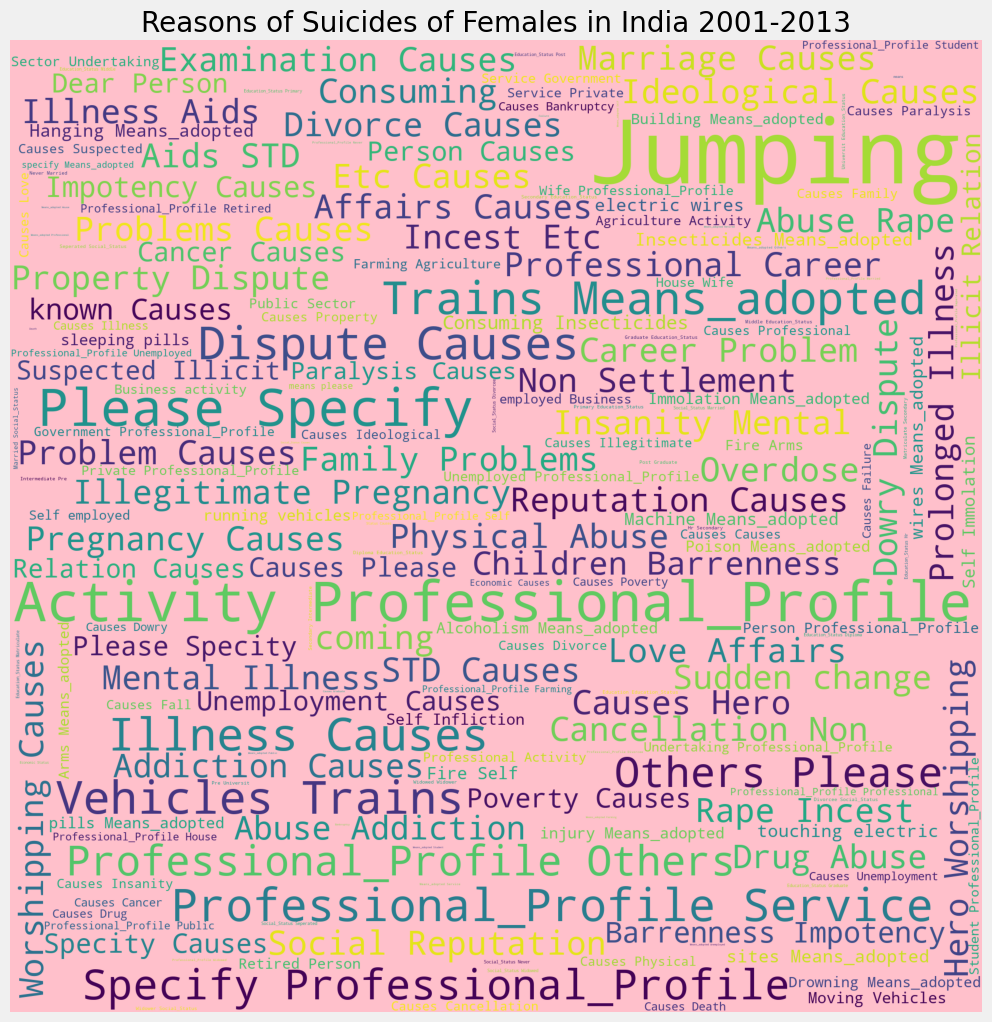

In [64]:
df1['Text'] = df1['Type'] + ' ' + df1['Type_code'].astype(str)

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color='pink', height=2000, width=2000, stopwords=stopwords).generate(' '.join(df1['Text']))

plt.rcParams['figure.figsize'] = (12, 12)

plt.axis("off")

plt.imshow(wordcloud)
plt.title("Reasons of Suicides of Females in India 2001-2013")

plt.show()


C:\Users\Shashikanth\AppData\Local\Temp\ipykernel_8600\2440603606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Text'] = df2['Type'] + ' ' + df2['Gender'].astype(str)


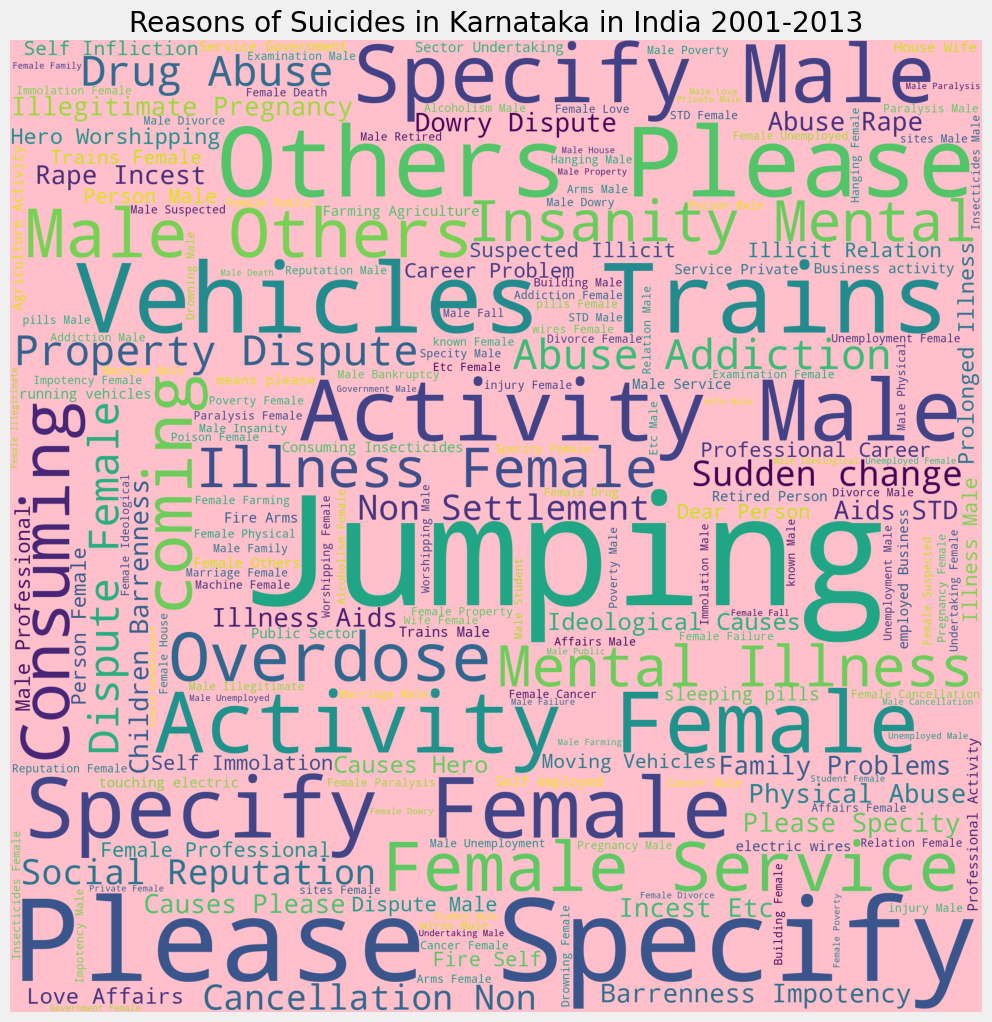

In [63]:
df2['Text'] = df2['Type'] + ' ' + df2['Gender'].astype(str)

stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color='pink', height=2000, width=2000, stopwords=stopwords).generate(' '.join(df2['Text']))

plt.rcParams['figure.figsize'] = (12, 12)

plt.axis("off")

plt.imshow(wordcloud)
plt.title("Reasons of Suicides in Karnataka in India 2001-2013")

plt.show()


<h1>Conclusions</h1>

The Causes of the deaths are more related to the Social Status, Affairs, Mental Ilness,Marriage, Social reputation and Divorce.

<h1>Suggestions</h1>

The Cause of the Deaths are more related to the Social Status and reputation morely,
People must be very careful about thier jobs and relationships and Marriages.
